# Homework: Integration using Three Methods

[//]: # "未來：對一個 multi dimensional integration, 用 Gaussian quadrature 來做，然後與 QMC 比較。"



##  Let's redo the integration problem using QMC:

  \begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
  - Use quasi Monte Carlo method to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different values $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

Consider the transformation $x=\frac{2t-1}{t-t^2}$, Jacobian is $\frac{2t^2-2t+1}{(t^2-t)^2}$

In [1]:
using Distributions, HaltonSequences, Plots, WebIO, Interact



every=50
n_end=20000
n_start=every
n_values=n_start:every:n_end

hpt=Halton(2, length=n_end)

function my_integral(; n=10000)
    g(x)=exp((-1/3)*(x^2))*sqrt(1+x^2)
    x(t)=(2t-1)/(t-t^2)
    J(t)=(2t^2-2t+1)/((t^2-t)^2)
    f(t)=g(x(t))*J(t)
    return sum( f.(hpt[1:n]) ) / n
end

my_integral_values=[my_integral(n=n) for n in n_values]

allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n_values[1:grid]  # the max of grid is allgrids
    approx1 = my_integral_values[1:grid]
    plot(n1, approx1, label="approx.=$(approx1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
    xlabel!("n")
    ylabel!("Integral value")
    title!("Convergence Path of Integral")
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 400, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
200, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000002853712c0, Task (runnable) @0x00000002853712c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36

## 
Consider the following integration problem:
\begin{align}
  I = \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx.
\end{align}
Assume $a = 10^{-5}$, $c=10^{-9}$, and $k=2$.

### Plot (multiple) graphs of the integrand to have a basic understanding of the problem. As you can see from the equation, the integrand may be tricky when $x$ approaches 0 and when $x$ approaches 1. Therefore, plot the graphs that highlight the integrand's shape near x=0 and x=1.

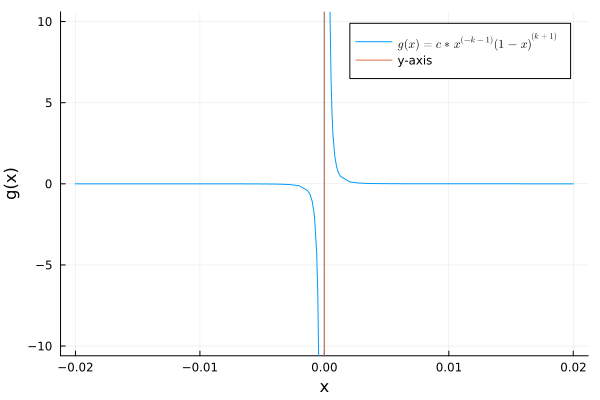

In [1]:
using Plots, LaTeXStrings



a=10^(-5)
c=10^(-9)
k=2

legend=L"g(x)=c*x^{(-k-1)}(1-x)^{(k+1)}"

g(x)=c*(x^(-k-1))*((1-x)^(k+1))

plot(x -> g(x), xlim=[-0.02, 0.02], ylim=[-10, 10], label=legend, xlabel="x", ylabel="g(x)")
vline!([0], label="y-axis")

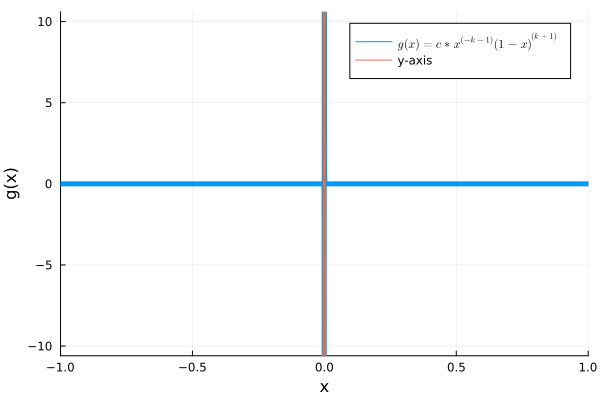

In [2]:
plot(x -> g(x), xlim=(-1, 1), ylim=[-10, 10], label=legend, xlabel="x", ylabel="g(x)", width=5)
vline!([0], label="y-axis", width=3)

當x趨近於0, g(x) 趨近正負無窮大

當x=1, g(x)=0

### Use the Gauss-Legendre rule to compute the integral. How many nodes are required to have a stable solution (say, five digits after the decimal point are unchanged) ? 
- Hint: A lot of nodes.

Consider transformation $x=\frac{a+b}{2}+\frac{b-a}{2}t$, Jacobian is $\frac{b-a}{2}$

GLinteg(a = 10 ^ -5, b = 1) = 4.999700035890363


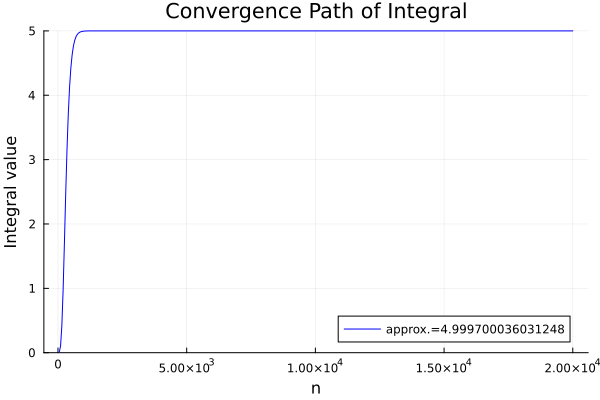

In [13]:
using FastGaussQuadrature, Plots

c=10^(-9)
k=2

function GLinteg(;a=10^(-5), b=1, n=2500)
    g(x)=c*(x^(-k-1))*((1-x)^(k+1))
    x(t)=(a+b)/2+(b-a)*t/2
    J(t)=(b-a)/2
    f(t)=g(x(t))*J(t)
    xi, wi = gausslegendre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


@show GLinteg(a=10^(-5), b=1)



GLinteg_values = [GLinteg(a=10^(-5), b=1, n=n) for n in n_values]


plot(n_values, GLinteg_values, ylim=[0,5], label="approx.=$(GLinteg_values[end])", color=:blue)
xlabel!("n")
ylabel!("Integral value")
title!("Convergence Path of Integral")

We need more than 2000 nodes to have a stable solution (five digits after the decimal point are unchanged).

### Use both of the Monte Carlo method (with pseudo random numbers) and Quasi-Monte Carlo method (with the Halton sequence) to compute the integral. How long does the sequences need to be in order to have a stable solution (2 digits after the decimal point)? Which method, MC or QMC, uses smaller values of $n$?
- Hint: A very long sequence.
- Hint: The following generates a Halton sequence of length 100 with the base number=2: `using HaltonSequences;` `lds=Halton(2,100)`.

Consider the transformation $x=a+(b-a)t$, Jacobian is $b-a$

In [14]:
## Monte Carlo Method

using Random

Random.seed!(138)


c=10^(-9)
k=2


function MC_integral(;a=10^(-5), b=1, n=10000)
    g(x)=c*(x^(-k-1))*((1-x)^(k+1))
    x(t)=a+(b-a)*t
    J(t)=(b-a)
    f(t)=g(x(t))*J(t)
    t=rand(n) #U(0,1)
    return sum(f.(t))/n
end

@show MC_integral(a=10^(-5), b=1, n=400000000)

MC_integral(a = 10 ^ -5, b = 1, n = 400000000) = 5.004008488855141


5.004008488855141

In [15]:
## Quasi-Monte Carlo

using HaltonSequences

every=1000



c=10^(-9)
k=2
function QMC_integral(;a=10^(-5), b=1, n=10000)
    lds=Halton(2,length=n)
    g(x)=c*(x^(-k-1))*((1-x)^(k+1))
    x(t)=a+(b-a)*t
    J(t)=(b-a)
    f(t)=g(x(t))*J(t)
    return sum( f.(lds[1:n]) ) / n
end


@show QMC_integral(n=210000000)


QMC_integral(n = 210000000) = 5.00542843870939


5.00542843870939

From above, we need extremely long sequence to get stable solution (2 digits after the decimal point), the efficiency is pretty poor. QMC uses smaller value of n than that of MC.

### Julia provides a package `QuadGK.jl` which has a function `quadgk()` that uses *adaptive quadratures* to do one-dimensional numerical integration. Use `using Pkg; Pkg.add("QuadGK.jl")` to install it, and `using QuadGK` to call it.
- Please read Section 1.3 on `Lec4 Numerical Integration - class.ipynb` to understand what is adaptive quadratures.
- Use `quadgk()` function to compute the integration.

In [37]:
using QuadGK

a=10^(-5)
c=10^(-9)
k=2


g(x)=c*(x^(-k-1))*((1-x)^(k+1))

quadgk(g, a, 1)

(4.999700036038787, 8.45481638595678e-10)

### You tried several methods to calculate the integration: The Gauss-Legendre method, the quasi-Monte Carlo method using the Halton sequence, the Monte Carlo method using random draws, and the adaptive quadrature method. How would you rank the methods from the most efficient (in terms of using a smaller number of draws/points, which usually translates to shorter run time) to the least efficient? Please explain the possible reasons behind the most and the least efficient methods.

根據效率性以及上面的計算，可能會有以下由高到低的效率排序：

1. Adaptive quadrature method
2. Gauss-Legendre method
3. Quasi-Monte Carlo method using the Halton sequence
4. Monte Carlo method using random draws

GL method 之所以有效率是因為他選擇一組最適的nodes和weights去計算積分，而Adaptive quadrature method 則是因為他將積分區域的不同部分使用不同數量的節點(more points would be required to evaluate region with high curvature where only a few nodes may be enough for other regions with gentle variations)

MC method 通常需要使用更多的隨機抽樣才能獲得所需的精確度， QMC method通常也需要更多節點才能達到所需的精確度，且Halton sequence的構造方式也可能導致誤差(larger primes, latter segments have poor uniformity.)

尤其這次積分的函數形狀很不規則, 而MC method, QMC method又無法根據integrand的形狀去做調整, 因此需要的節點更多，誤差也大。

adaptive quadrature應該較好，可用quadgk_count計算